In [ ]:
# KMEANS CLUSTERING ALGORITHM

In [2]:
# reading in the dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

%matplotlib inline
shopping_datasetCL = pd.read_csv('shopping_trends_updated.csv')
shopping_datasetCL.head()

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually


In [3]:
# sum of null values, should be 0 is no null values
shopping_datasetCL.isnull().sum()

,0
Customer ID,0
Age,0
Gender,0
Item Purchased,0
Category,0
Purchase Amount (USD),0
Location,0
Size,0
Color,0
Season,0


In [4]:
# sum of any duplicates
duplicate_set = shopping_datasetCL.duplicated().sum()
print(f'Duplicated rows in shoppping dataset: {duplicate_set}')

Duplicated rows in shoppping dataset: 0


In [5]:
# double check what columns are in the dataset
print(shopping_datasetCL.columns)

Index(['Customer ID', 'Age', 'Gender', 'Item Purchased', 'Category',
       'Purchase Amount (USD)', 'Location', 'Size', 'Color', 'Season',
       'Review Rating', 'Subscription Status', 'Shipping Type',
       'Discount Applied', 'Promo Code Used', 'Previous Purchases',
       'Payment Method', 'Frequency of Purchases'],
      dtype='object')


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

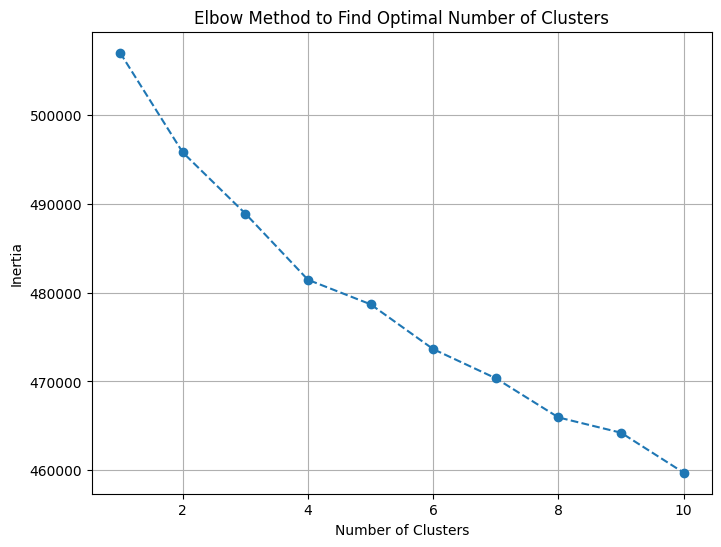

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


         Customer ID        Age  Purchase Amount (USD)  Review Rating  \
Cluster                                                                 
0        1959.759599  44.442404              60.255426       3.790651   
1        1907.265432  44.311728              57.172840       3.746914   
2         845.008634  44.042386              59.214286       3.731476   
3        2782.477393  43.910159              60.496183       3.750029   

         Previous Purchases  Gender_Male  Subscription Status_Yes  \
Cluster                                                             
0                 25.232053     0.667780                 0.285476   
1                 24.956790     0.688272                 0.280864   
2                 25.664050     1.000000                 0.620879   
3                 25.234880     0.443335                 0.000000   

         Shipping Type_Express  Shipping Type_Free Shipping  \
Cluster                                                       
0                   

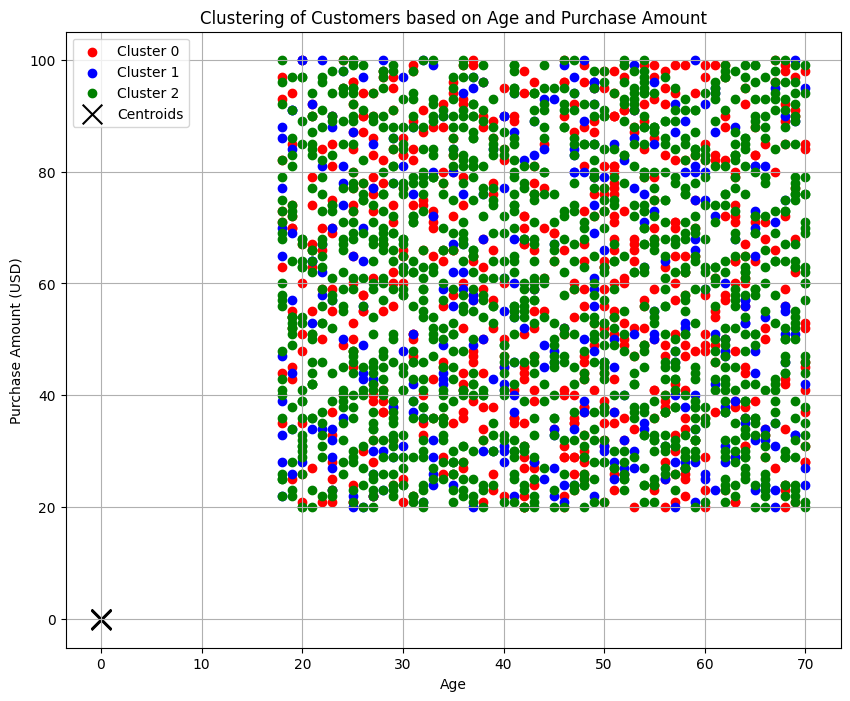

Silhouette Score: 0.027721083469850003

Cluster 0 Analysis:
       Customer ID         Age  Purchase Amount (USD)  Review Rating  \
count   599.000000  599.000000             599.000000     599.000000   
mean   1959.759599   44.442404              60.255426       3.790651   
std    1134.036389   14.612598              23.638439       0.719843   
min       4.000000   18.000000              20.000000       2.500000   
25%     952.500000   32.000000              39.000000       3.200000   
50%    1997.000000   46.000000              60.000000       3.800000   
75%    2950.500000   56.000000              81.000000       4.400000   
max    3899.000000   70.000000             100.000000       5.000000   

       Previous Purchases  Cluster  
count          599.000000    599.0  
mean            25.232053      0.0  
std             14.184094      0.0  
min              1.000000      0.0  
25%             13.000000      0.0  
50%             25.000000      0.0  
75%             37.000000      0

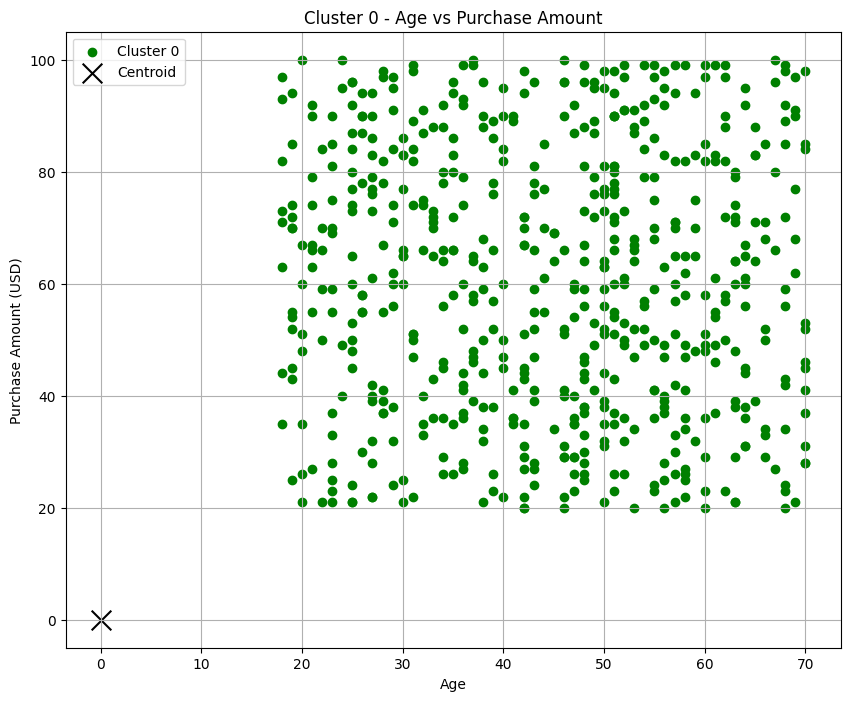


Cluster 1 Analysis:
       Customer ID         Age  Purchase Amount (USD)  Review Rating  \
count   324.000000  324.000000             324.000000     324.000000   
mean   1907.265432   44.311728              57.172840       3.746914   
std    1146.170827   15.377753              24.590033       0.702598   
min       9.000000   18.000000              20.000000       2.500000   
25%     917.500000   31.000000              34.000000       3.100000   
50%    1971.500000   45.000000              54.500000       3.800000   
75%    2858.250000   58.000000              80.000000       4.300000   
max    3873.000000   70.000000             100.000000       5.000000   

       Previous Purchases  Cluster  
count          324.000000    324.0  
mean            24.956790      1.0  
std             15.319244      0.0  
min              1.000000      1.0  
25%             11.000000      1.0  
50%             25.000000      1.0  
75%             39.000000      1.0  
max             50.000000      1.0

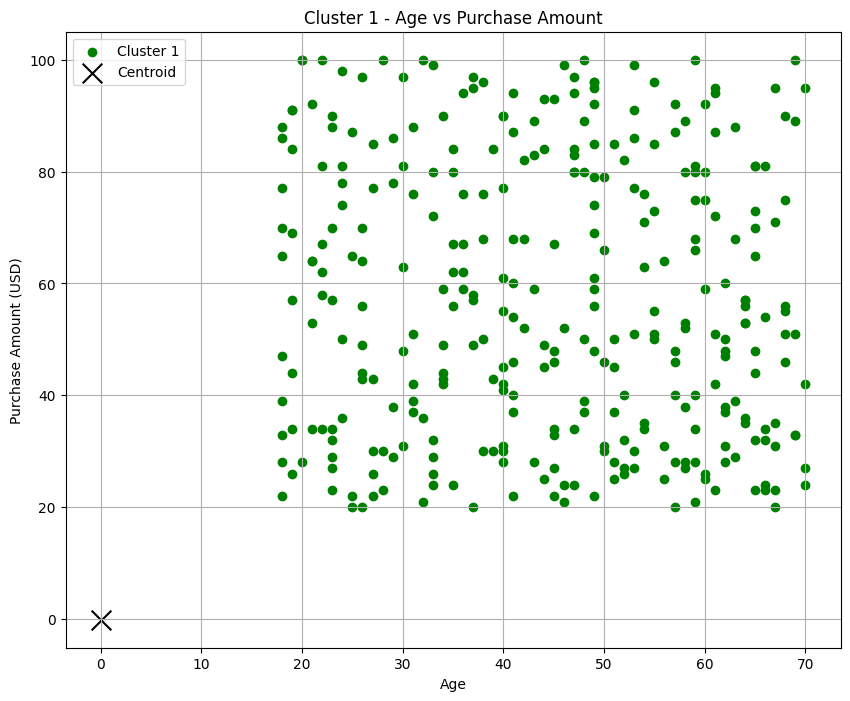


Cluster 2 Analysis:
       Customer ID          Age  Purchase Amount (USD)  Review Rating  \
count  1274.000000  1274.000000            1274.000000    1274.000000   
mean    845.008634    44.042386              59.214286       3.731476   
std     485.721602    15.411193              23.579427       0.715823   
min       1.000000    18.000000              20.000000       2.500000   
25%     420.250000    30.250000              38.250000       3.100000   
50%     845.000000    43.000000              59.000000       3.700000   
75%    1264.750000    57.000000              79.000000       4.375000   
max    1677.000000    70.000000             100.000000       5.000000   

       Previous Purchases  Cluster  
count         1274.000000   1274.0  
mean            25.664050      2.0  
std             14.433753      0.0  
min              1.000000      2.0  
25%             14.000000      2.0  
50%             25.000000      2.0  
75%             38.000000      2.0  
max             50.000000

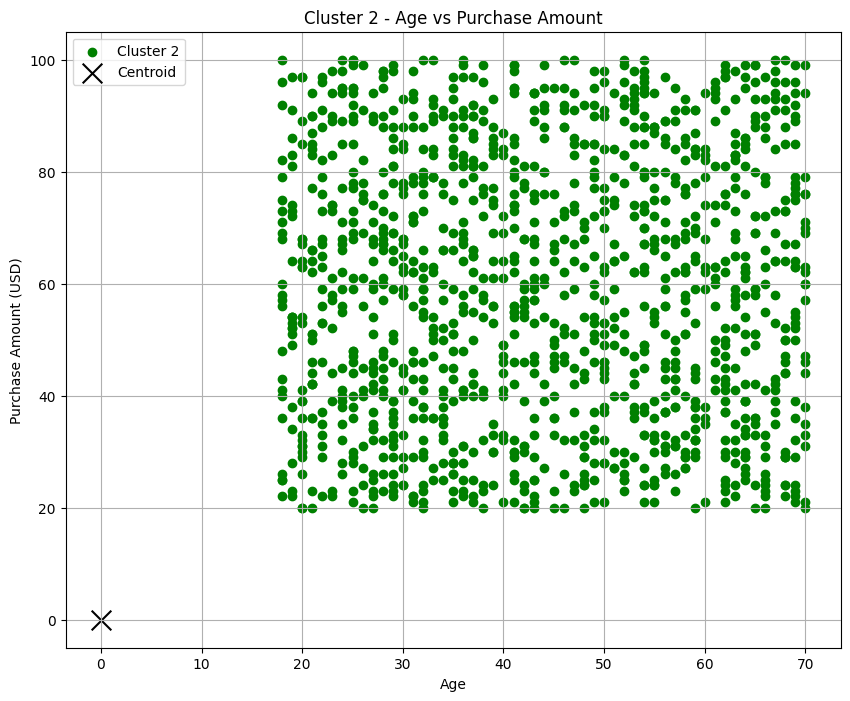


Cluster 3 Analysis:
       Customer ID          Age  Purchase Amount (USD)  Review Rating  \
count  1703.000000  1703.000000            1703.000000    1703.000000   
mean   2782.477393    43.910159              60.496183       3.750029   
std     647.292992    15.237317              23.581767       0.717851   
min    1678.000000    18.000000              20.000000       2.500000   
25%    2210.000000    31.000000              40.000000       3.100000   
50%    2792.000000    44.000000              61.000000       3.800000   
75%    3342.500000    57.000000              81.000000       4.400000   
max    3900.000000    70.000000             100.000000       5.000000   

       Previous Purchases  Cluster  
count         1703.000000   1703.0  
mean            25.234880      3.0  
std             14.386597      0.0  
min              1.000000      3.0  
25%             13.000000      3.0  
50%             26.000000      3.0  
75%             37.000000      3.0  
max             50.000000

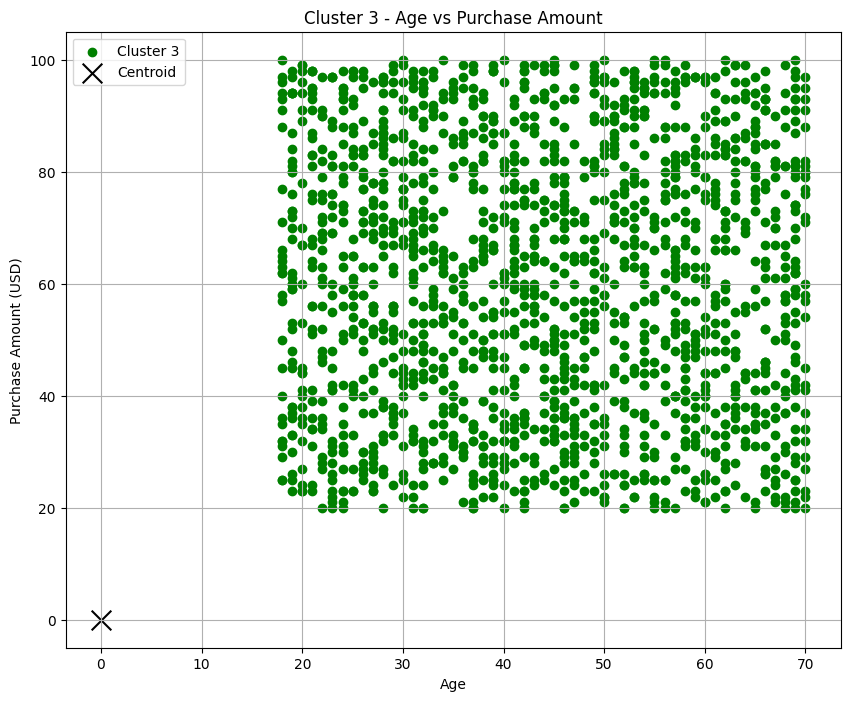


Cluster 0 Preferences:
Top 5 Items Purchased in Cluster 0:
Item Purchased_Sandals     0.267112
Item Purchased_Shoes       0.250417
Item Purchased_Sneakers    0.242070
Item Purchased_Boots       0.240401
Item Purchased_Belt        0.000000
dtype: float64
Top 5 Locations in Cluster 0:
Location_Ohio         0.030050
Location_Minnesota    0.028381
Location_Maryland     0.028381
Location_Maine        0.028381
Location_Nebraska     0.026711
dtype: float64
Top 5 Payment Methods in Cluster 0:
Payment Method_Venmo          0.180301
Payment Method_Cash           0.173623
Payment Method_PayPal         0.171953
Payment Method_Debit Card     0.165275
Payment Method_Credit Card    0.155259
dtype: float64


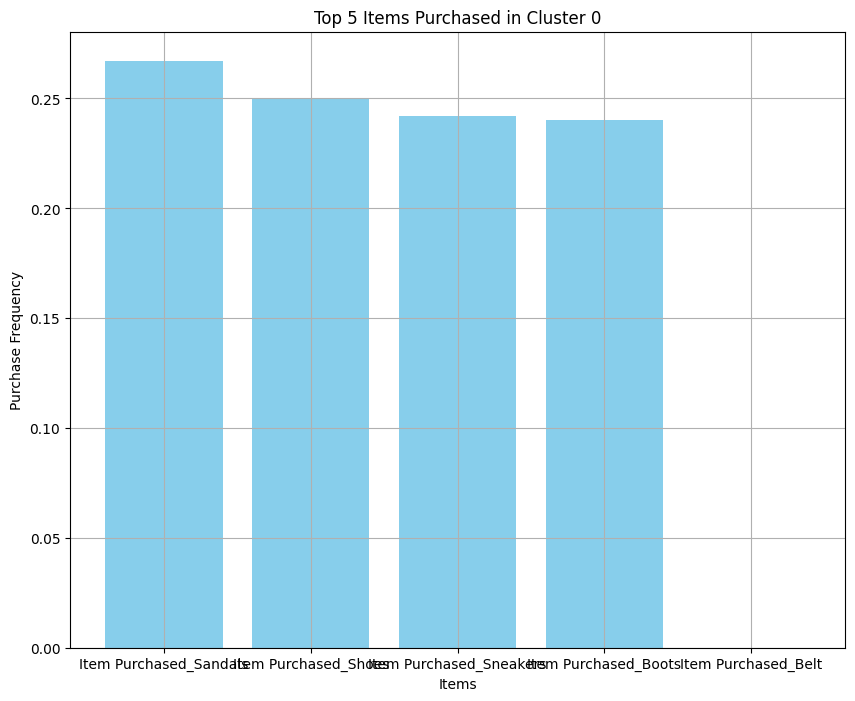

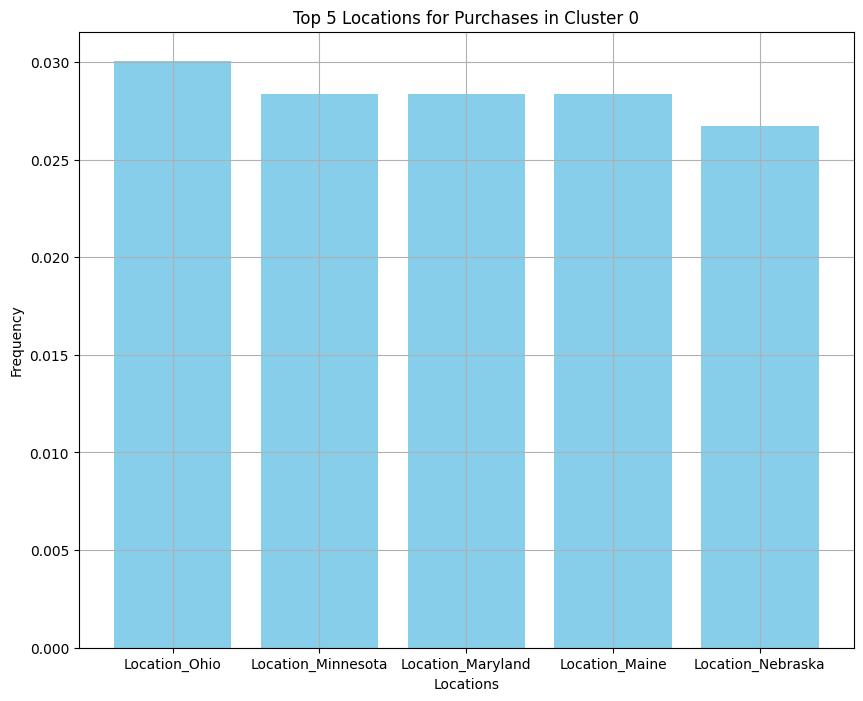

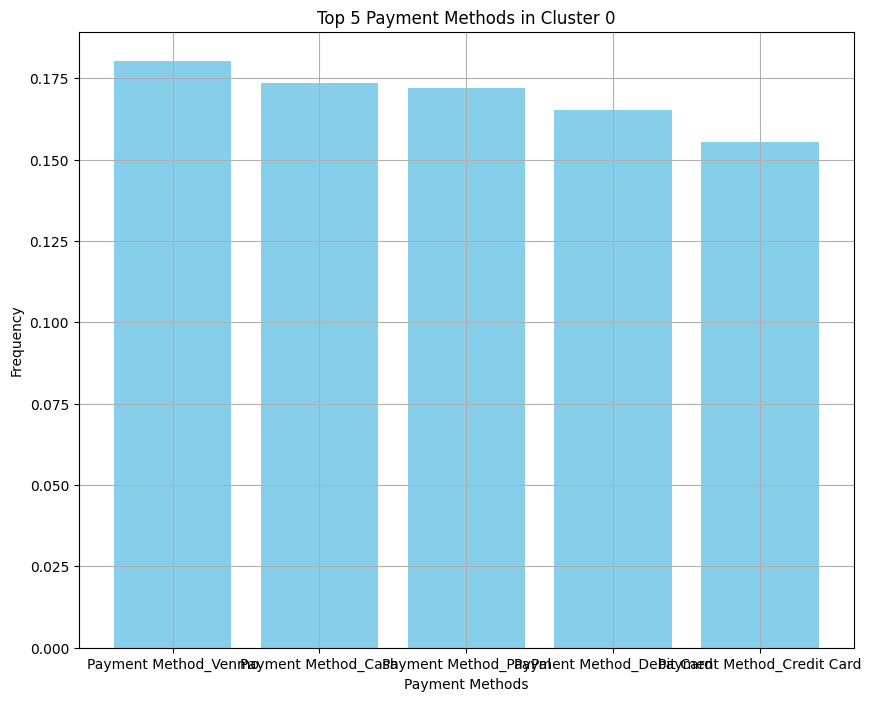


Cluster 1 Preferences:
Top 5 Items Purchased in Cluster 1:
Item Purchased_Jacket     0.503086
Item Purchased_Coat       0.496914
Item Purchased_Belt       0.000000
Item Purchased_Sandals    0.000000
Item Purchased_Sweater    0.000000
dtype: float64
Top 5 Locations in Cluster 1:
Location_North Dakota    0.043210
Location_Montana         0.033951
Location_Idaho           0.030864
Location_Connecticut     0.030864
Location_Oklahoma        0.030864
dtype: float64
Top 5 Payment Methods in Cluster 1:
Payment Method_PayPal         0.185185
Payment Method_Venmo          0.169753
Payment Method_Credit Card    0.166667
Payment Method_Cash           0.157407
Payment Method_Debit Card     0.151235
dtype: float64


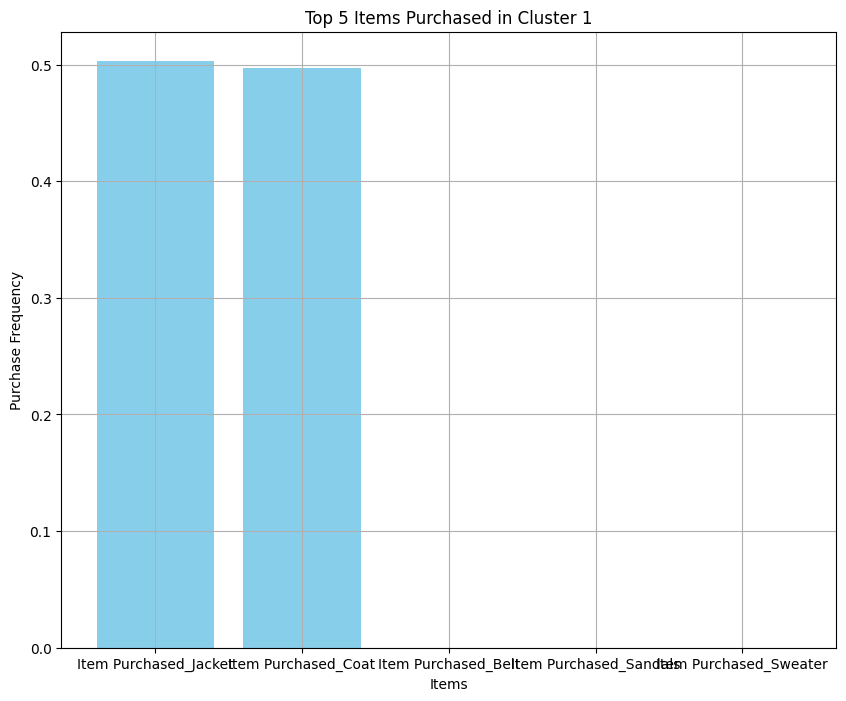

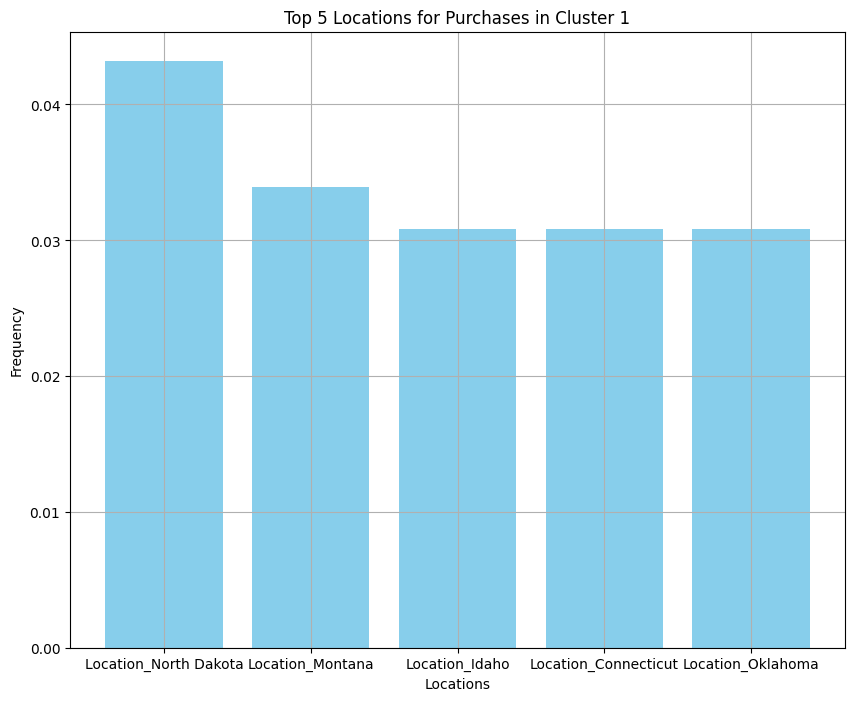

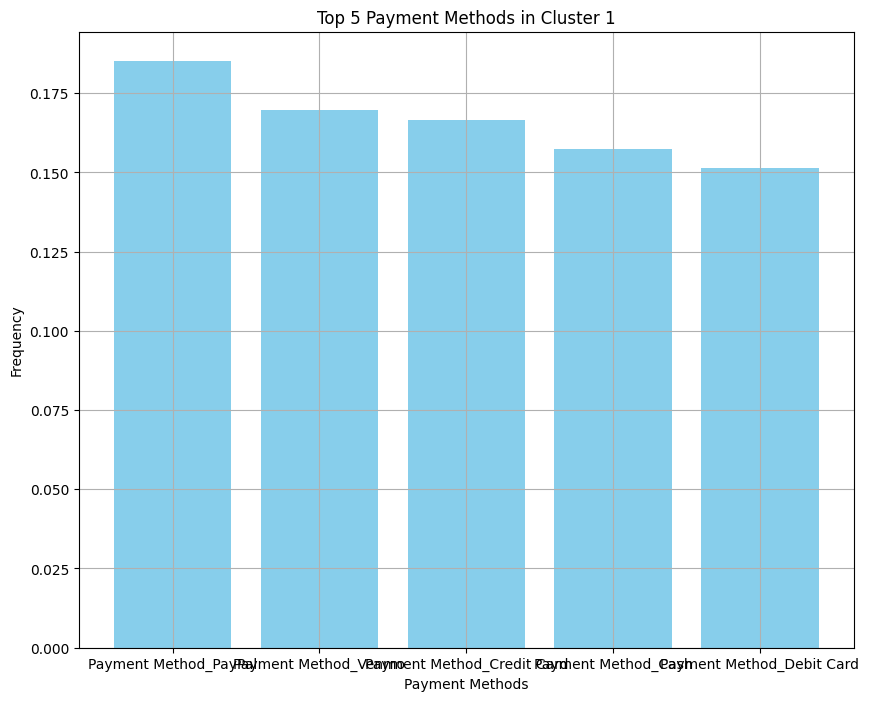


Cluster 2 Preferences:
Top 5 Items Purchased in Cluster 2:
Item Purchased_Pants      0.063579
Item Purchased_Sweater    0.062009
Item Purchased_Hat        0.060440
Item Purchased_Jewelry    0.059655
Item Purchased_Dress      0.058870
dtype: float64
Top 5 Locations in Cluster 2:
Location_Indiana        0.029042
Location_California     0.025903
Location_Nevada         0.025903
Location_Arkansas       0.025118
Location_Mississippi    0.025118
dtype: float64
Top 5 Payment Methods in Cluster 2:
Payment Method_Credit Card    0.176609
Payment Method_Debit Card     0.169545
Payment Method_Cash           0.168760
Payment Method_PayPal         0.166405
Payment Method_Venmo          0.164050
dtype: float64


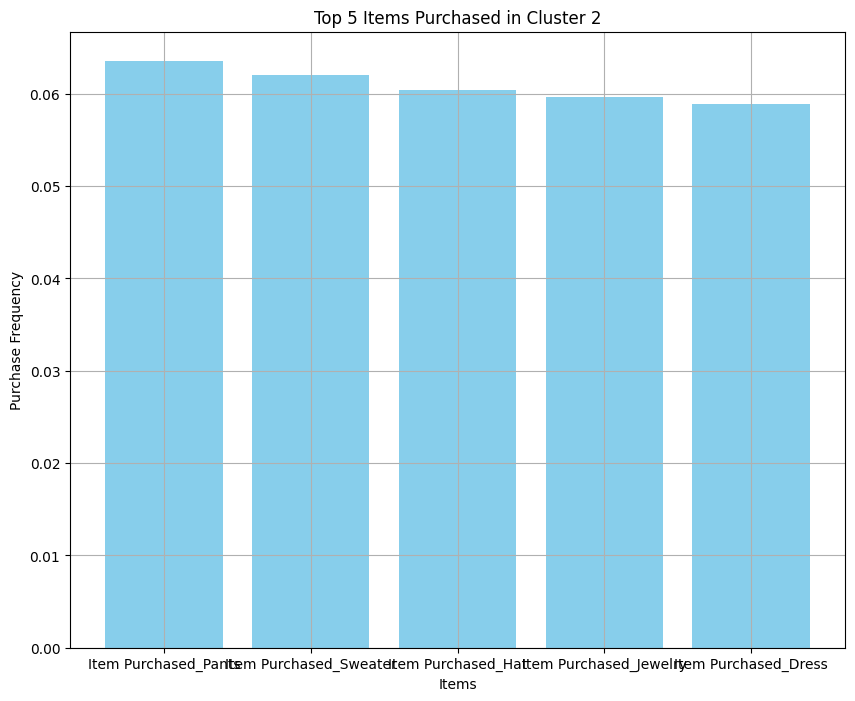

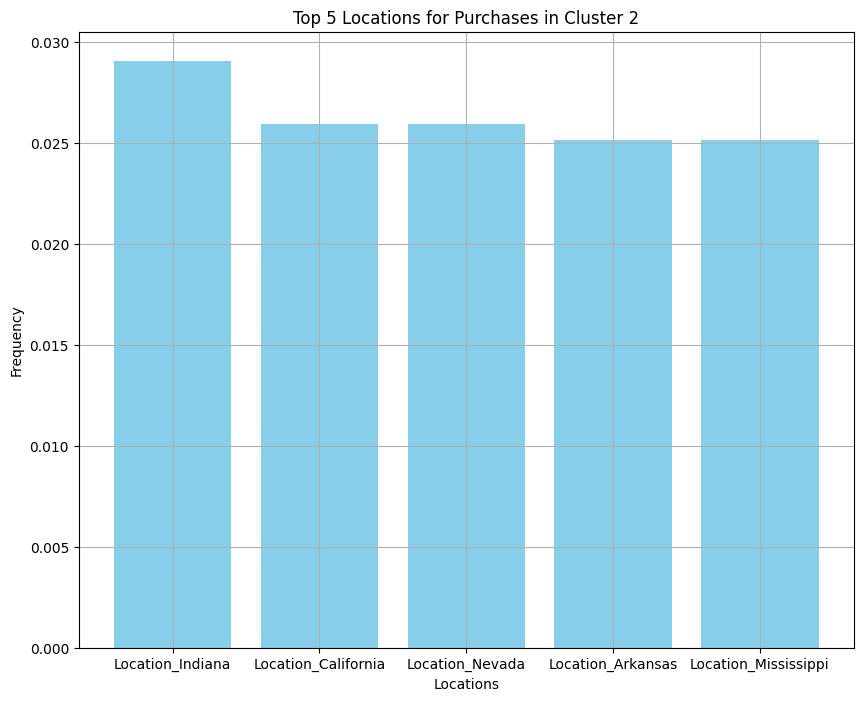

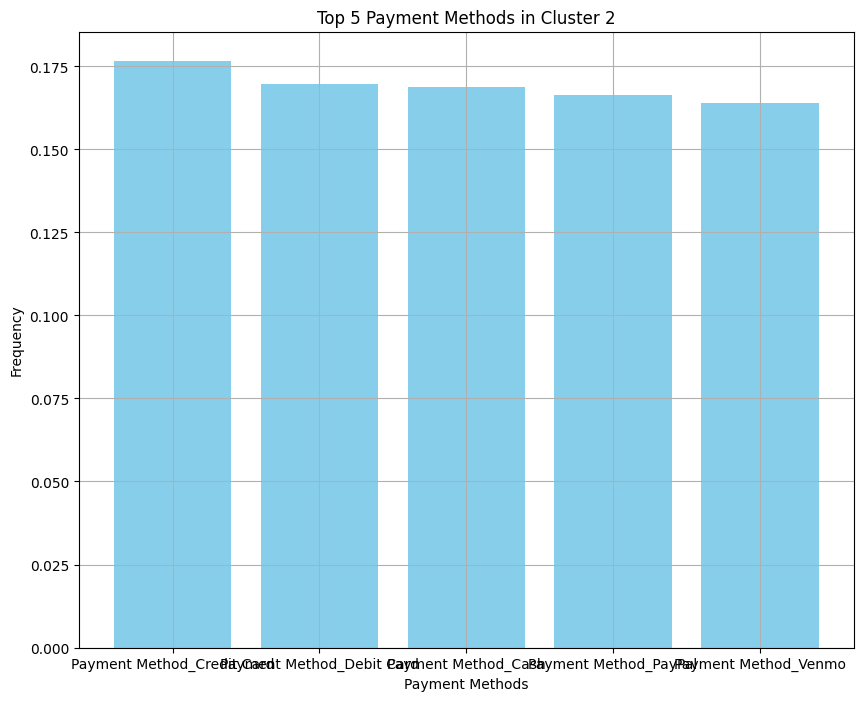


Cluster 3 Preferences:
Top 5 Items Purchased in Cluster 3:
Item Purchased_Blouse     0.066353
Item Purchased_Socks      0.062830
Item Purchased_Shirt      0.057546
Item Purchased_Skirt      0.056958
Item Purchased_Jewelry    0.055784
dtype: float64
Top 5 Locations in Cluster 3:
Location_Montana       0.028186
Location_Illinois      0.027011
Location_California    0.026424
Location_Idaho         0.025837
Location_Vermont       0.024662
dtype: float64
Top 5 Payment Methods in Cluster 3:
Payment Method_PayPal         0.177334
Payment Method_Cash           0.176160
Payment Method_Credit Card    0.175573
Payment Method_Debit Card     0.159718
Payment Method_Venmo          0.153846
dtype: float64


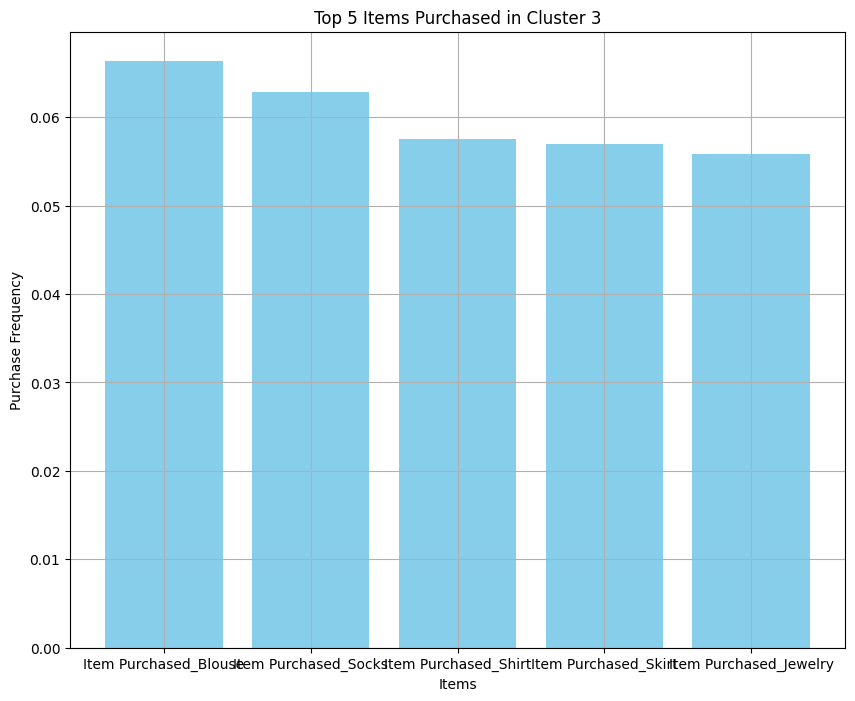

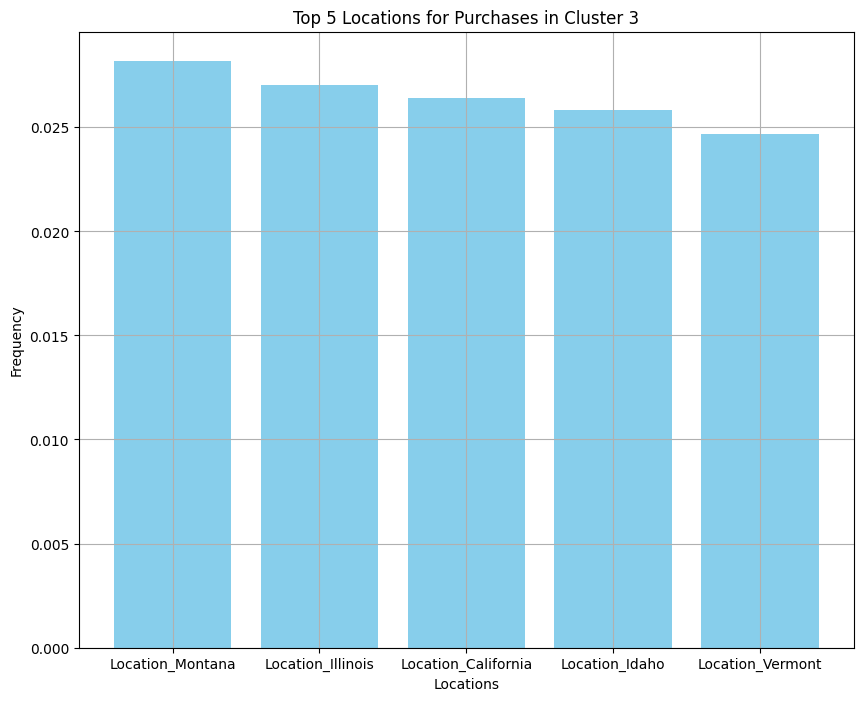

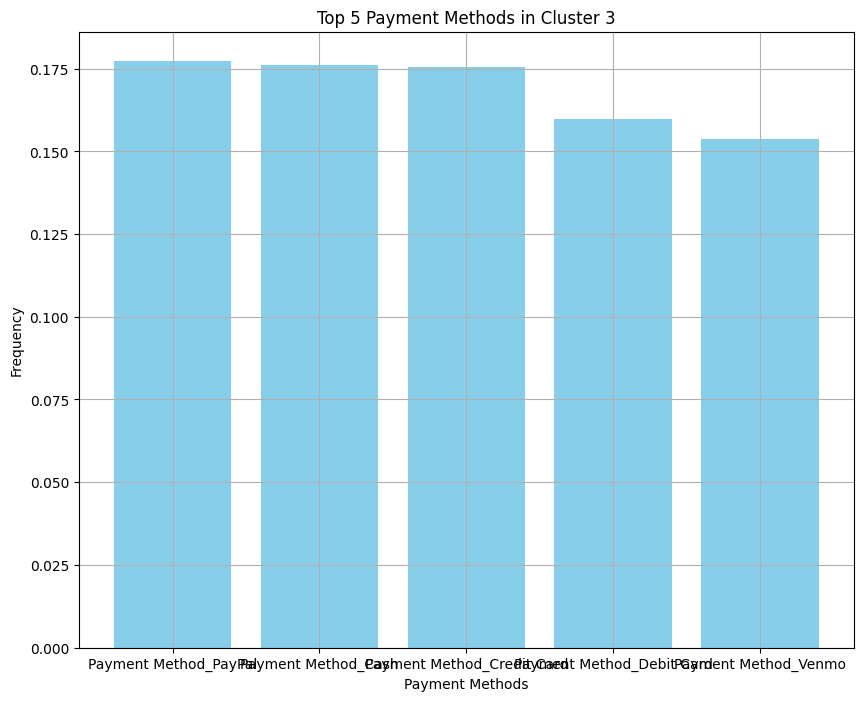

In [6]:
# convert numeric columns to appropriate types
numeric_cols = ['Age', 'Purchase Amount (USD)', 'Review Rating', 'Previous Purchases']
for col in numeric_cols:
    shopping_datasetCL[col] = pd.to_numeric(shopping_datasetCL[col], errors='coerce')

# one-hot encode categorical columns
categorical_cols = ['Gender', 'Subscription Status', 'Shipping Type', 'Discount Applied',
                    'Promo Code Used', 'Payment Method', 'Frequency of Purchases',
                    'Item Purchased', 'Category', 'Location', 'Size', 'Color', 'Season']
shopping_datasetCL_encoded = pd.get_dummies(shopping_datasetCL, columns=categorical_cols, drop_first=True)

# features for clustering
selected_features = numeric_cols + \
                    [col for col in shopping_datasetCL_encoded.columns if col not in numeric_cols and col != 'Customer ID']

X = shopping_datasetCL_encoded[selected_features]

# normalize data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# elbow method to find optimal number of clusters
inertia = []
for k in range(1, 11):  # trying from 1 to 10 clusters
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# plotting the Elbow curve
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), inertia, marker='o', linestyle='--')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method to Find Optimal Number of Clusters')
plt.grid(True)
plt.show()

# optimal cluster from elbow method
#optimal_k = 3
optimal_k = 4

# fit K-means with optimal number of clusters
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
cluster_labels = kmeans.fit_predict(X_scaled)

# add cluster labels
shopping_datasetCL_encoded['Cluster'] = kmeans.labels_

# analyze clusters - mean values
cluster_means = shopping_datasetCL_encoded.groupby('Cluster').mean()
print(cluster_means)

# visualize clusters
plt.figure(figsize=(10, 8))
colors = ['red', 'blue', 'green']  # Adjust colors based on number of clusters
for cluster_num, color in zip(range(optimal_k), colors):
    cluster_data = shopping_datasetCL_encoded[shopping_datasetCL_encoded['Cluster'] == cluster_num]
    plt.scatter(cluster_data['Age'], cluster_data['Purchase Amount (USD)'], c=color, label=f'Cluster {cluster_num}')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker='x', s=200, c='black', label='Centroids')
plt.xlabel('Age')
plt.ylabel('Purchase Amount (USD)')
plt.title('Clustering of Customers based on Age and Purchase Amount')
plt.legend()
plt.grid(True)
plt.show()

# silhouette score
silhouette_avg = silhouette_score(X_scaled, cluster_labels)
print(f"Silhouette Score: {silhouette_avg}")

# additional analysis for understanding clusters
for cluster in range(optimal_k):
    print(f"\nCluster {cluster} Analysis:")
    cluster_data = shopping_datasetCL_encoded[shopping_datasetCL_encoded['Cluster'] == cluster]
    print(cluster_data.describe())

    # visualize cluster with different features
    plt.figure(figsize=(10, 8))
    plt.scatter(cluster_data['Age'], cluster_data['Purchase Amount (USD)'], c=color, label=f'Cluster {cluster}')
    plt.scatter(kmeans.cluster_centers_[cluster, selected_features.index('Age')],
                kmeans.cluster_centers_[cluster, selected_features.index('Purchase Amount (USD)')],
                marker='x', s=200, c='black', label='Centroid')
    plt.xlabel('Age')
    plt.ylabel('Purchase Amount (USD)')
    plt.title(f'Cluster {cluster} - Age vs Purchase Amount')
    plt.legend()
    plt.grid(True)
    plt.show()

# analysis for customized marketing strategies
for cluster in range(optimal_k):
    print(f"\nCluster {cluster} Preferences:")
    cluster_data = shopping_datasetCL_encoded[shopping_datasetCL_encoded['Cluster'] == cluster]

    # analyse the most common Item Purchased in each cluster
    item_cols = [col for col in cluster_data.columns if col.startswith('Item Purchased_')]
    top_items = cluster_data[item_cols].mean().sort_values(ascending=False).head(5)
    print(f"Top 5 Items Purchased in Cluster {cluster}:")
    print(top_items)

    # analyse the most common Location in each cluster
    location_cols = [col for col in cluster_data.columns if col.startswith('Location_')]
    top_locations = cluster_data[location_cols].mean().sort_values(ascending=False).head(5)
    print(f"Top 5 Locations in Cluster {cluster}:")
    print(top_locations)

    # analyse the most common Payment Method in each cluster
    payment_cols = [col for col in cluster_data.columns if col.startswith('Payment Method_')]
    top_payment_methods = cluster_data[payment_cols].mean().sort_values(ascending=False).head(5)
    print(f"Top 5 Payment Methods in Cluster {cluster}:")
    print(top_payment_methods)

    # visualize purchasing behavior in terms of frequency
    plt.figure(figsize=(10, 8))
    plt.bar(top_items.index, top_items.values, color='skyblue')
    plt.xlabel('Items')
    plt.ylabel('Purchase Frequency')
    plt.title(f'Top 5 Items Purchased in Cluster {cluster}')
    plt.grid(True)
    plt.show()

    plt.figure(figsize=(10, 8))
    plt.bar(top_locations.index, top_locations.values, color='skyblue')
    plt.xlabel('Locations')
    plt.ylabel('Frequency')
    plt.title(f'Top 5 Locations for Purchases in Cluster {cluster}')
    plt.grid(True)
    plt.show()

    plt.figure(figsize=(10, 8))
    plt.bar(top_payment_methods.index, top_payment_methods.values, color='skyblue')
    plt.xlabel('Payment Methods')
    plt.ylabel('Frequency')
    plt.title(f'Top 5 Payment Methods in Cluster {cluster}')
    plt.grid(True)
    plt.show()

